# Homework 4

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from kmodes.kmodes import KModes

sns.set(style="whitegrid")
warnings.filterwarnings("ignore", category=FutureWarning)  # Optional: suppress warnings


### Preparing the dataset

In [2]:
# Define the dataset path
dataset_path = '../../datasets/accounts.csv'

# Load the dataset
df = pd.read_csv(dataset_path)

# Select the first 8 features
df_selected = df.iloc[:, :8]

# Remove duplicates
df_selected = df_selected.drop_duplicates()

# Remove null values
df_selected = df_selected.dropna()

df_selected

,age,job,marital,education,default,balance,housing,loan
0,59,admin.,married,secondary,no,2343,yes,no
1,56,admin.,married,secondary,no,45,no,no
2,41,technician,married,secondary,no,1270,yes,no
3,55,services,married,secondary,no,2476,yes,no
4,54,admin.,married,tertiary,no,184,no,no
...,...,...,...,...,...,...,...,...
11156,34,blue-collar,single,secondary,no,-72,yes,no
11157,33,blue-collar,single,primary,no,1,yes,no
11158,39,services,married,secondary,no,733,no,no
11159,32,technician,single,secondary,no,29,no,no


### Data preprocessing
We have categorical data that needs to be converted to numerical, so we can apply MinMaxScaler and StandardScaler.

In [3]:
df_preprocessed = pd.get_dummies(df_selected, drop_first=True)

df_preprocessed.head()


,age,balance,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes
0,59,2343,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False
1,56,45,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
2,41,1270,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False
3,55,2476,False,False,False,False,False,False,True,False,...,False,False,True,False,True,False,False,False,True,False
4,54,184,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False


### Exercise 1

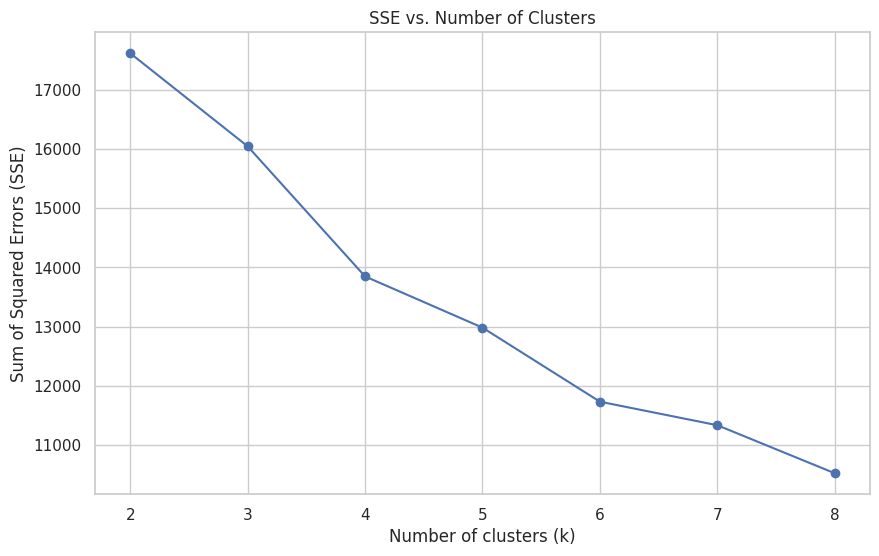

In [4]:
# Normalize the data
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_preprocessed)

# Apply K-means clustering with different values of k
sse = []
k_values = range(2, 9)
for kmeans in k_values:
    kmeans = KMeans(n_clusters=kmeans, max_iter=500, random_state=42)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)

# Plot the SSE for each value of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE vs. Number of Clusters')
plt.grid(True)  # Add grid for better readability
plt.show()

Usually to determine the optimal number of clusters, we look for an elbow point and assume that the number of clusters in that point is the optimal. An elbow point happens when the rate of decrease in SSE slows down. This means that adding more clusters will only decrease SSE by a small fraction. As we can see in this plot, the elbow point is when k = 4. Using this method, for this data set, the optimal number of clusters is 4.

### K-modes

K-modes strength is categorical data. Instead of measuring the euclidean distance, it counts how many categories differ between datapoints (hamming distance). K means computes the average of each coordinate of each datapoint in the cluster to calculate the centroid whereas K-modes calculates the most common category for each variable in all dapoints in the cluster. 
In this dataset there are 2 numerical variables and 6 categorical variables.

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3491, cost: 39155.0
Run 1, iteration: 2/100, moves: 166, cost: 39155.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2901, cost: 35033.0
Run 1, iteration: 2/100, moves: 369, cost: 35033.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2849, cost: 34083.0
Run 1, iteration: 2/100, moves: 77, cost: 34083.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2347, cost: 32833.0
Run 1, iteration: 2/100, moves: 20, cost: 32833.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4134, cost: 32372.0
Run 1, iteration: 2/100, moves: 128, cost: 32346.0
Run 1, iteration: 3/100, moves: 0, cost: 32346.0
Init: initializing centroids
Init: ini

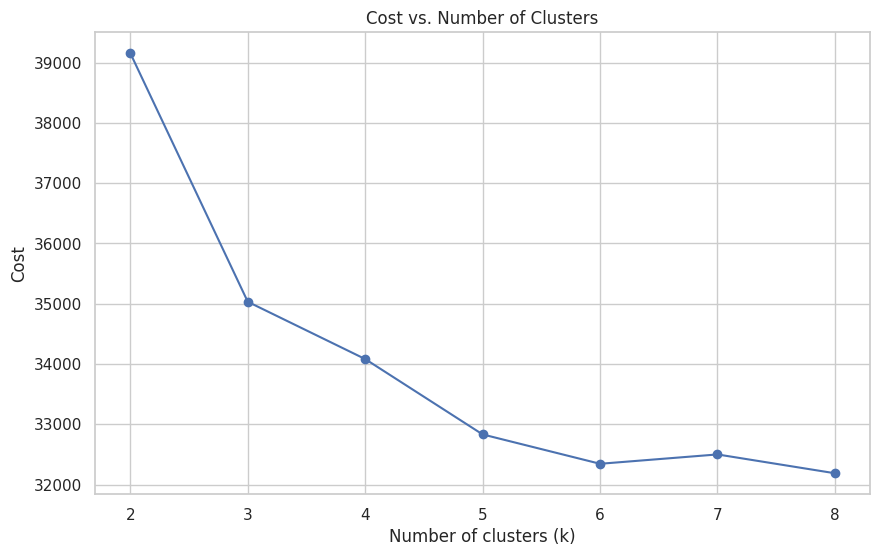

In [5]:
# Apply K-modes clustering with different values of k
cost = []
k_values = range(2, 9)
for kmeans in k_values:
    kmodes = KModes(n_clusters=kmeans, init='Huang', n_init=1, verbose=1, random_state=42)
    clusters = kmodes.fit_predict(df_selected)
    cost.append(kmodes.cost_)

# Plot the cost for each value of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, cost, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cost')
plt.title('Cost vs. Number of Clusters')
plt.grid(True)  # Add grid for better readability
plt.show()

## K-means or K-modes?

In the first chart, "SSE vs. Number of Clusters," we observe a sharp decline in the sum of squared errors (SSE) as the number of clusters increases from 2 to 4. After 4 clusters, the reduction in SSE slows down, suggesting an "elbow point" around 4 clusters. This indicates that 4 clusters may be a reasonable choice to balance model complexity with a good separation of the data.

In the second chart, "Cost vs. Number of Clusters," the cost decreases quickly between 2 and 5 clusters, then stabilizes, which suggests that 5 clusters might be appropriate.

Given that the dataset’s first 8 columns are mostly categorical variables (except for "age" and "balance"), the k-modes method is likely better suited to this data type, as it is designed for categorical data. K-means is more appropriate for numerical data, which explains the similar trend in both charts but with less accuracy in capturing patterns specific to categorical data.

Therefore, k-modes appears more aligned with the dataset's structure due to the categorical nature of the variables. For this analysis, k-modes is likely to produce clusters that are more representative of the data’s inherent patterns. 

/tmp/ipykernel_15170/1633026622.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_pca[:, 0], df_pca[:, 1], s=50, cmap='viridis')


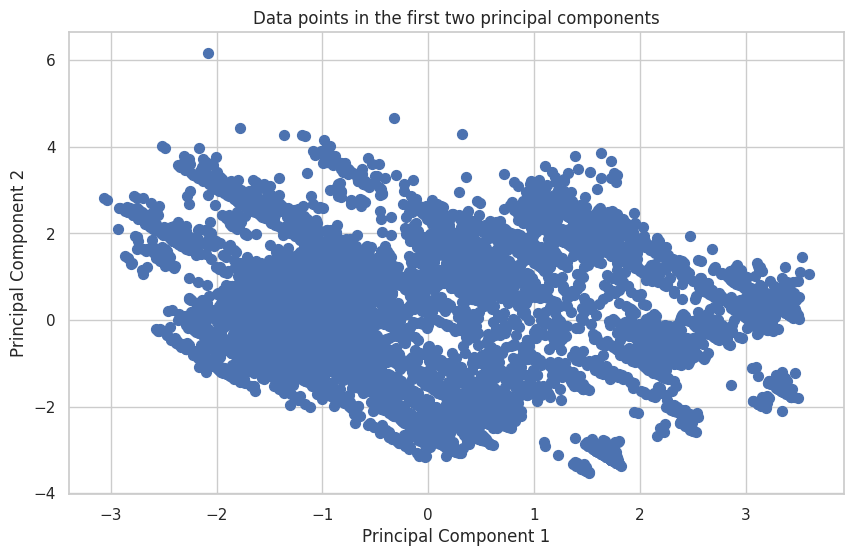

Variabilidade explicada pelas 2 primeiras componentes: 22.76%


In [6]:

# Normalize the data with Standard Scaler
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_preprocessed)

# Apply PCA to reduce the dimensionality
pca = PCA(n_components=2)

# Fit and transform the data
df_pca = pca.fit_transform(df_normalized)

# Plot the data points in the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], s=50, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data points in the first two principal components')
plt.grid(True)  # Add grid for better readability  
plt.show()

explained_variance = pca.explained_variance_ratio_.sum()
print(f"Variabilidade explicada pelas 2 primeiras componentes: {explained_variance:.2%}")

### K-means on the original dataset

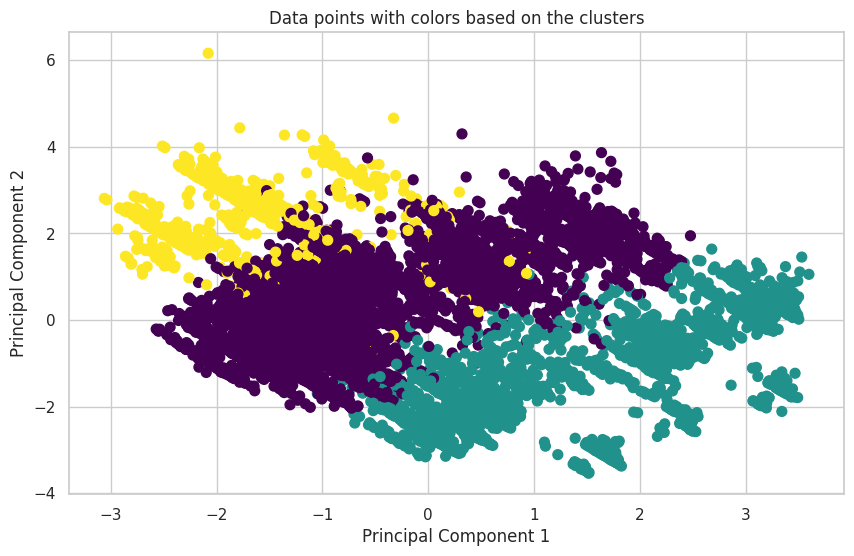

In [7]:
# Apply K-means clustering with k=3 and random_state=42
kmeans = KMeans(n_clusters=3, random_state=42)
clusters1 = kmeans.fit_predict(df_normalized)

# Plot the data points with colors based on the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters1, s=50, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data points with colors based on the clusters')
plt.grid(True)  # Add grid for better readability
plt.show()

### K-means on the dataset after PCA

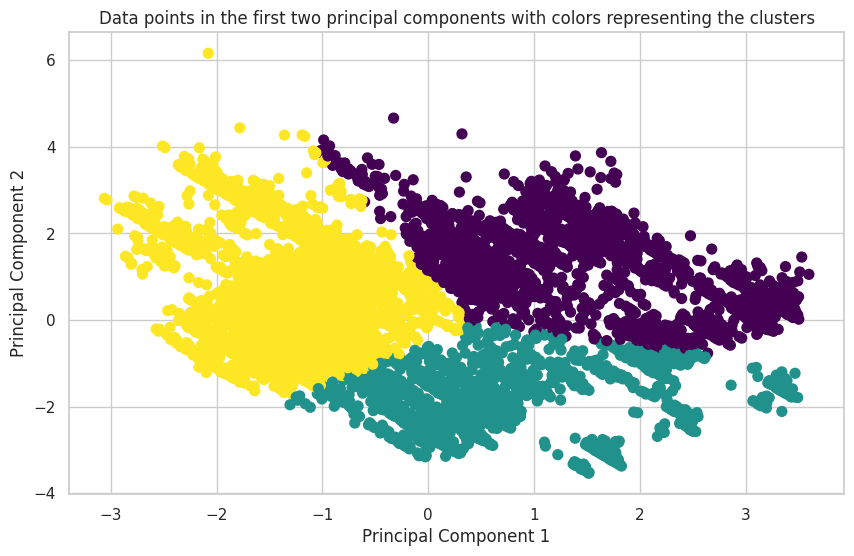

16855.699565818835

In [8]:
# Compute the variability explained by the principal components
pca.explained_variance_ratio_

# Apply K-means clustering with k=3 and random_state=42 and randomly initialize centroids, make several runs and choose the best fitting
kmeans = KMeans(n_clusters=3, init="random", n_init=30, random_state=42)
clusters2 = kmeans.fit_predict(df_pca)


# Plot the data points in the first two principal components with colors representing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters2, s=50, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data points in the first two principal components with colors representing the clusters')
plt.grid(True)  # Add grid for better readability
plt.show()

# Print SSE score
kmeans.inertia_

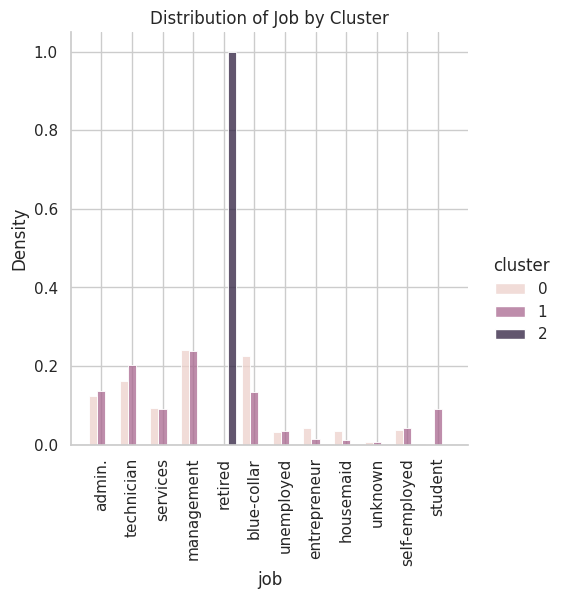

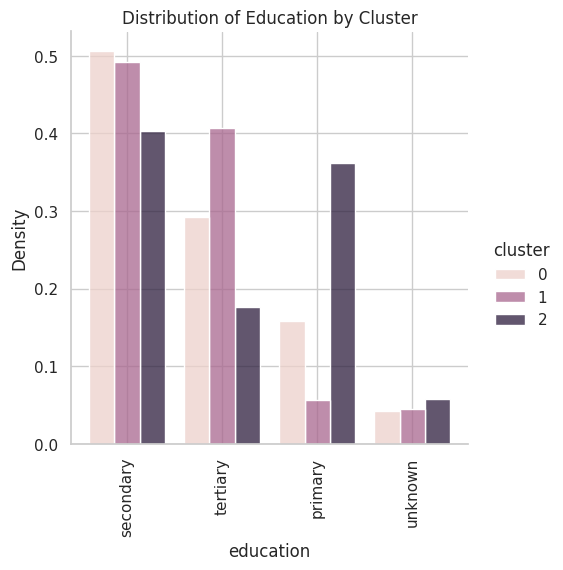

In [10]:
# Add the cluster labels to the original dataframe
df_selected['cluster'] = clusters1

# Plot the distribution of "job" according to the clusters
sns.displot(df_selected, x="job", hue="cluster", multiple="dodge", stat='density', shrink=0.8, common_norm=False)
plt.title('Distribution of Job by Cluster')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of "education" according to the clusters
sns.displot(df_selected, x="education", hue="cluster", multiple="dodge", stat='density', shrink=0.8, common_norm=False)
plt.title('Distribution of Education by Cluster')
plt.xticks(rotation=90)
plt.show()

## Description
The distribution plots for "Job" and "Education" reveal clear distinctions among the clusters, highlighting unique client segments based on socio-demographic characteristics. __Cluster 0__ displays a broad variety of professions, with a higher density in categories such as “blue-collar” and “technician,” which likely represents individuals engaged in mid- to lower-skilled jobs. __Cluster 1__, similarly diverse, has notable representation in “admin” and “technician” roles, suggesting a mix of professionals from various backgrounds without a single dominant category. In contrast, __Cluster 2__ is heavily concentrated in the “retired” category, indicating that this cluster is primarily composed of retired individuals, with minimal representation in other professions. This distribution implies that occupation is a significant factor in distinguishing clusters. The high concentration of retirees in __Cluster 2__ forms a distinct group, while __Clusters 0__ and __1__ exhibit greater occupational diversity, with an emphasis on technical and manual jobs.

The distribution of education levels further underscores differences between clusters. __Cluster 0__ shows a strong concentration of individuals with secondary education, with some representation at the tertiary level, suggesting an average education profile within this group. __Cluster 1__ follows a similar pattern, with a slight emphasis on secondary and tertiary education levels. __Cluster 2__, however, is marked by a high proportion of individuals with only primary education or with unknown educational backgrounds. This pattern is consistent with the retired demographic in this cluster, who may have lower or unspecified levels of formal education.

Together, these findings suggest that both occupation and education are key factors in the segmentation of customers. __Clusters 0__ and __1__, where individuals generally have higher levels of education, stand in contrast to __Cluster 2__, where lower or unknown educational levels are more prevalent. The combination of occupation and education distributions highlights distinct socio-economic profiles across the clusters, offering valuable insights for customer segmentation based on employment status and educational attainment.